# Kapitel 0: Einleitung und Überblick

# Kapitel 1: Riemann-Integrale mit Ober- und Untersummen, Trapezregel

# Kapitel 2: Monte-Carlo-Integration

# Kapitel 3: Visualisierung der Ergebnisse

# Kapitel 4: Testfälle und Evaluation

In [ ]:
pip install numpy matplotlib pandas scipy tabulate

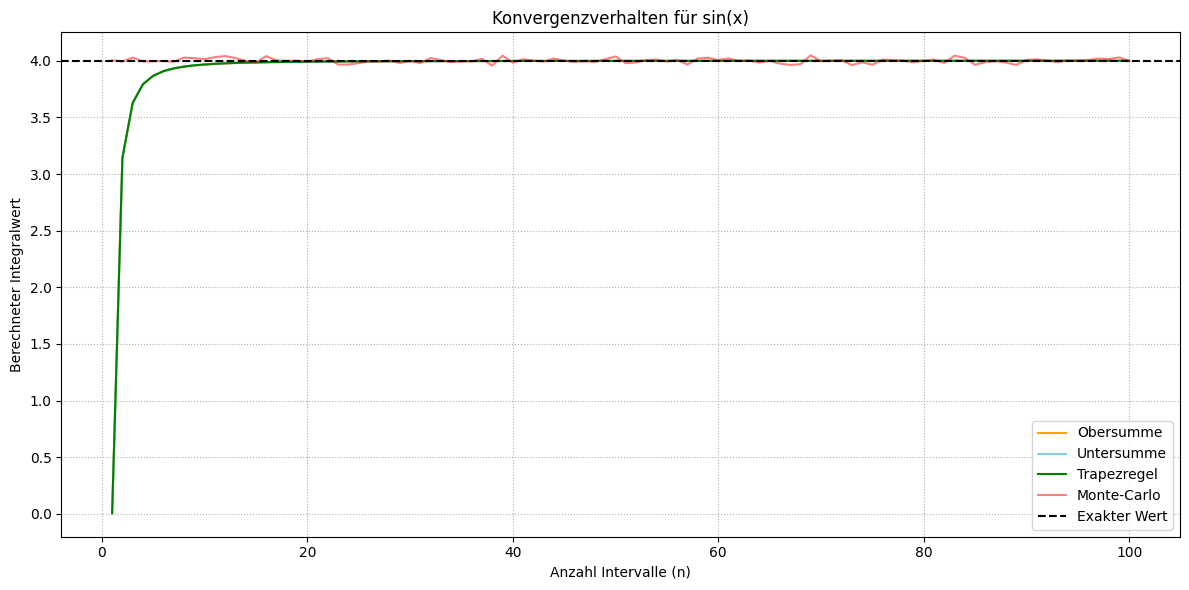

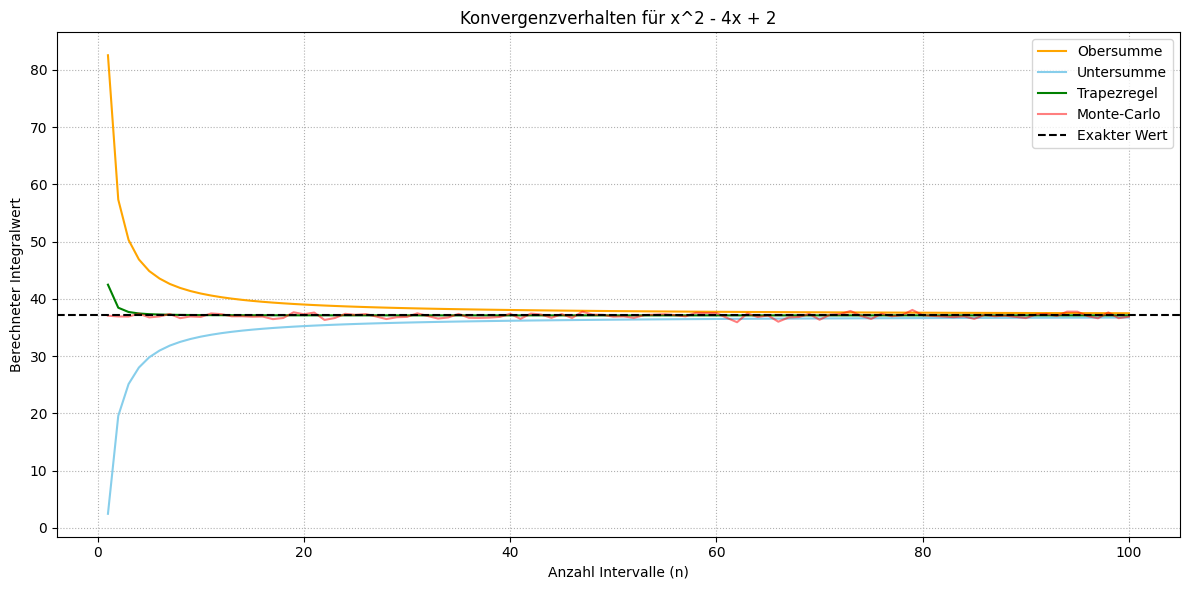

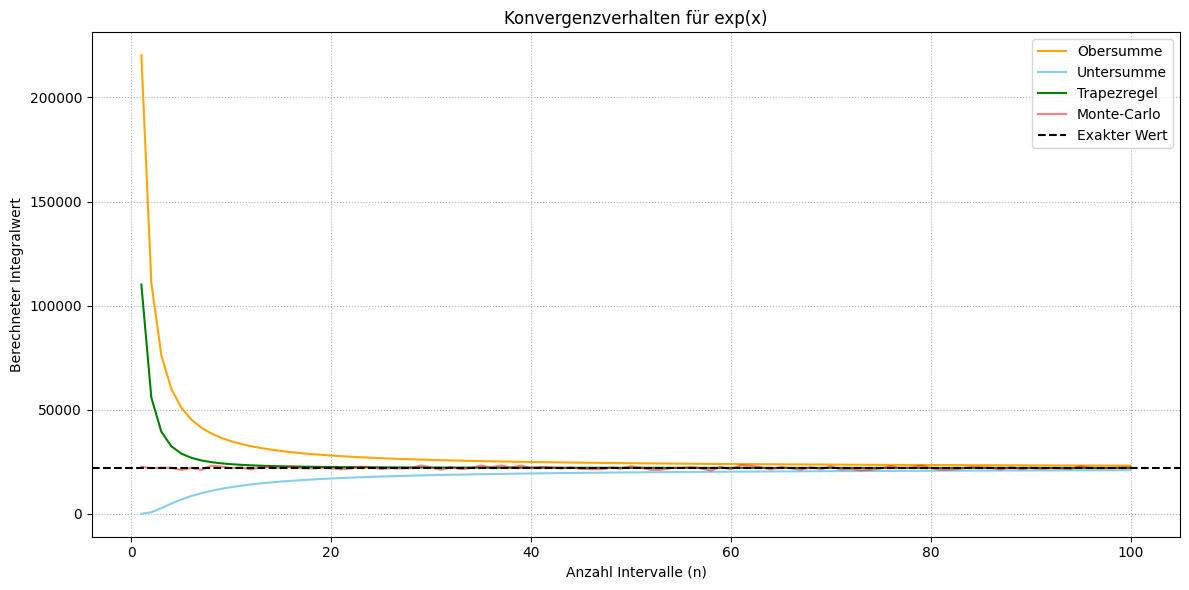

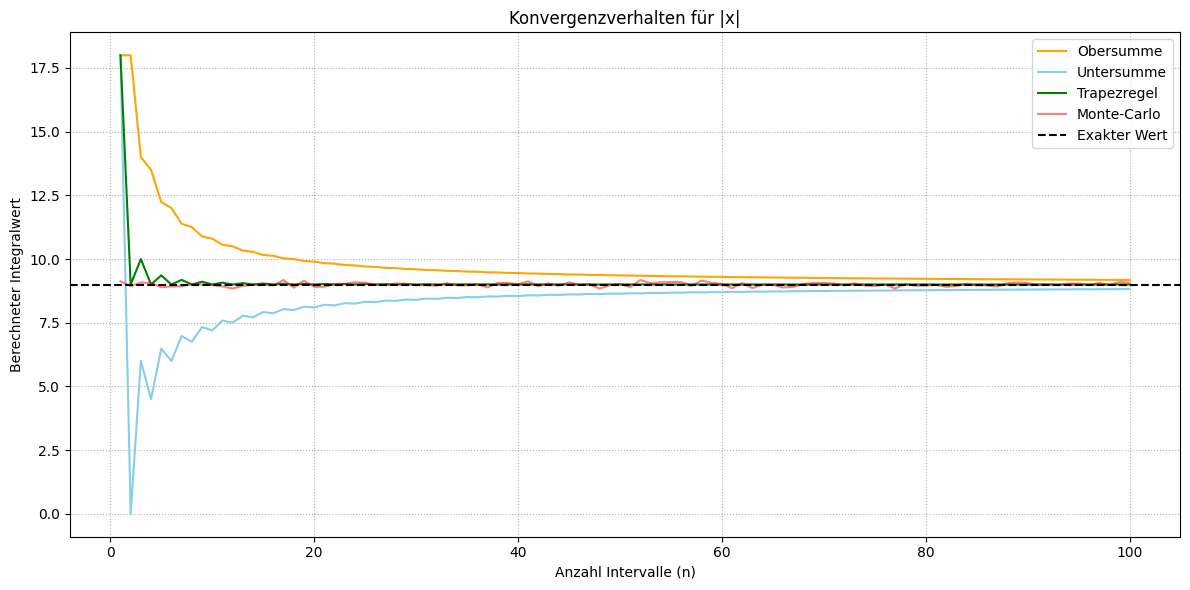

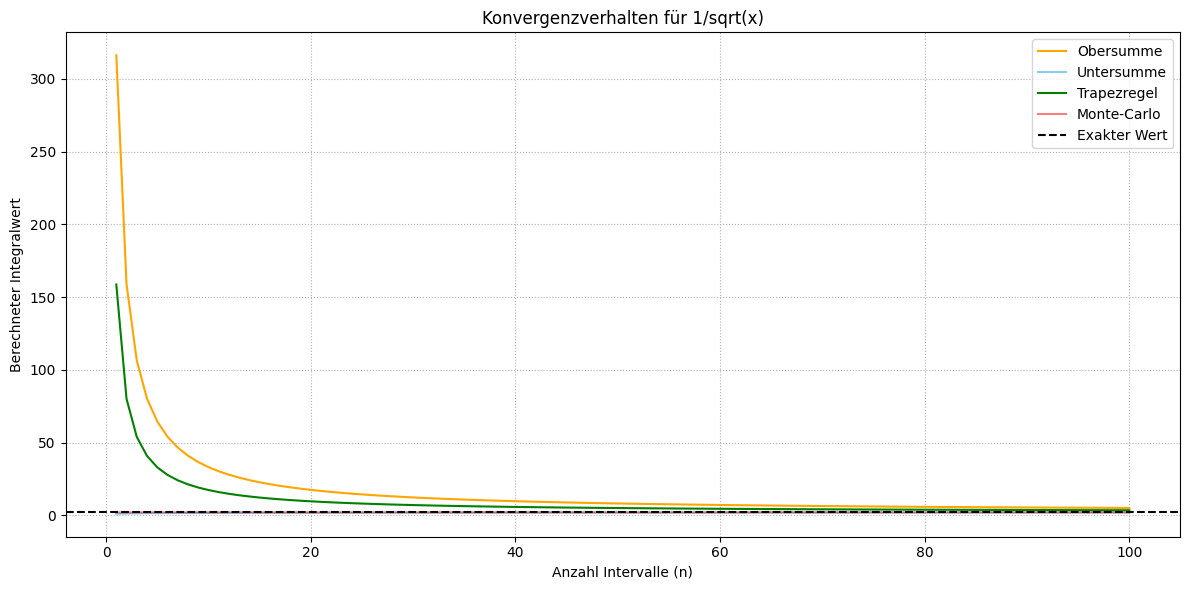

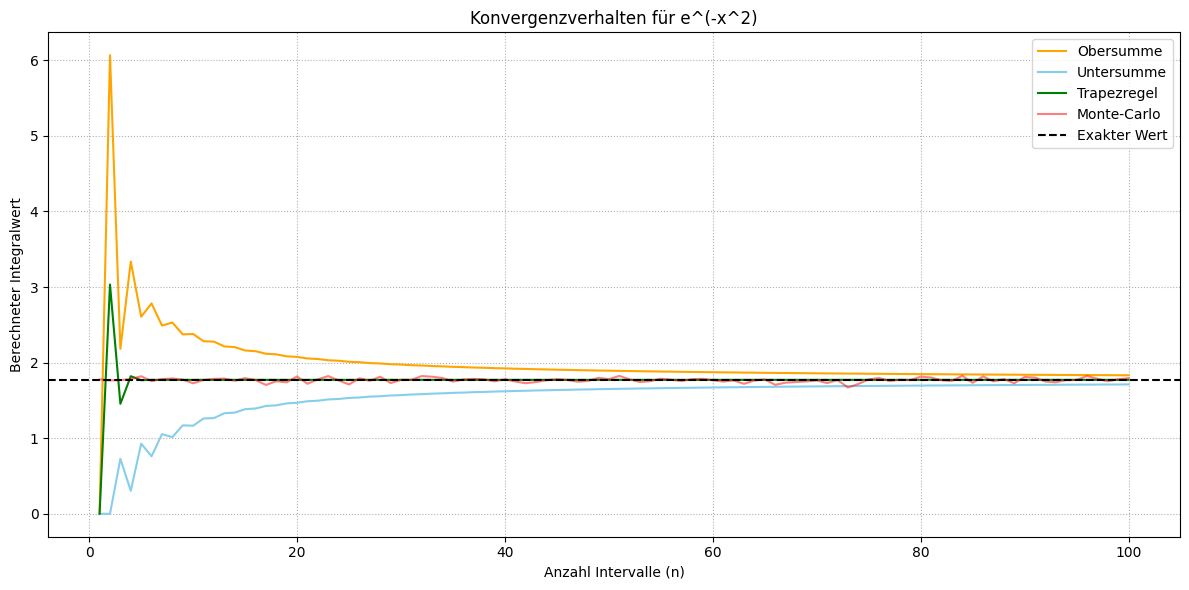

| Methode      |    Wert |     Fehler |
|:-------------|--------:|-----------:|
| Exakter Wert | 4       | 0          |
| Obersumme    | 3.99138 | 0.00862373 |
| Untersumme   | 3.99218 | 0.00781589 |
| Trapezregel  | 3.99178 | 0.00821981 |
| Monte-Carlo  | 4.0215  | 0.0215041  |


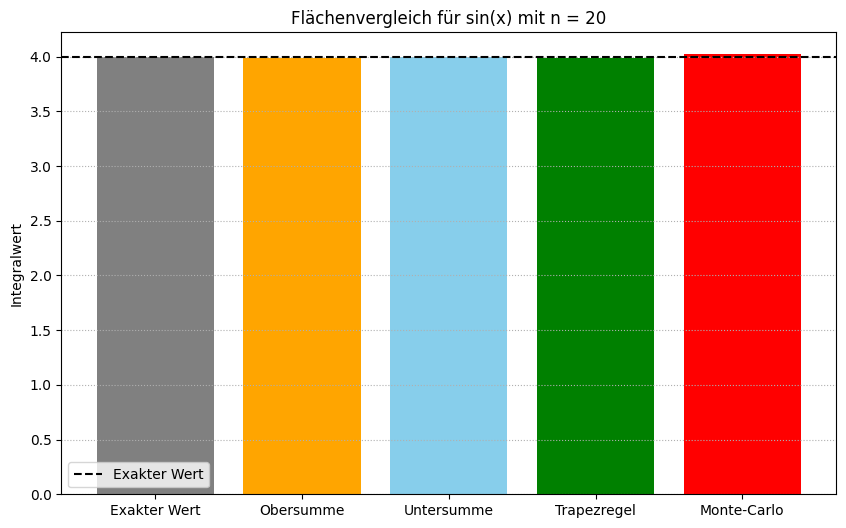

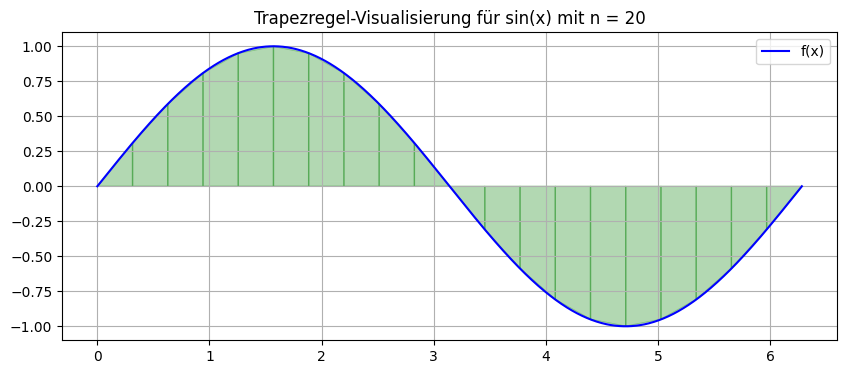

| Methode      |    Wert |     Fehler |
|:-------------|--------:|-----------:|
| Exakter Wert | 37.1045 | 0          |
| Obersumme    | 38.3665 | 1.26191    |
| Untersumme   | 35.8546 | 1.24999    |
| Trapezregel  | 37.1105 | 0.00596141 |
| Monte-Carlo  | 37.4248 | 0.320214   |


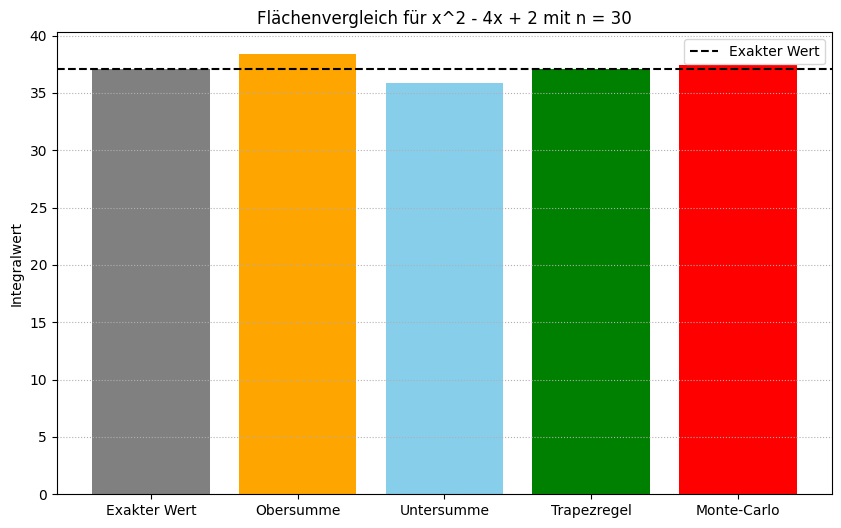

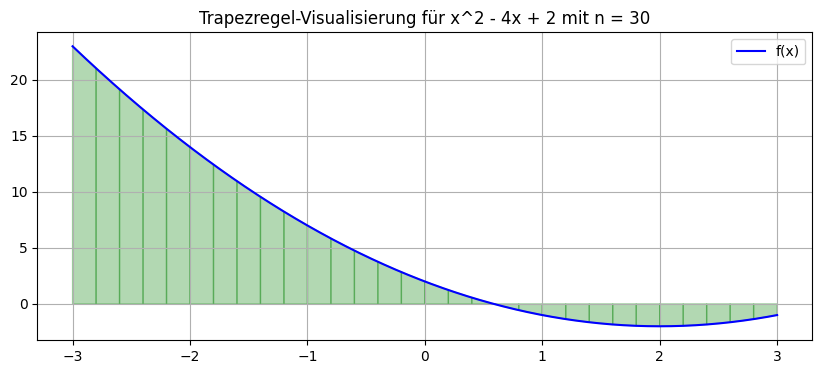

| Methode      |    Wert |    Fehler |
|:-------------|--------:|----------:|
| Exakter Wert | 22025.5 |    0      |
| Obersumme    | 24301.4 | 2275.92   |
| Untersumme   | 19896.3 | 2129.18   |
| Trapezregel  | 22098.8 |   73.3693 |
| Monte-Carlo  | 22556.5 |  531.064  |


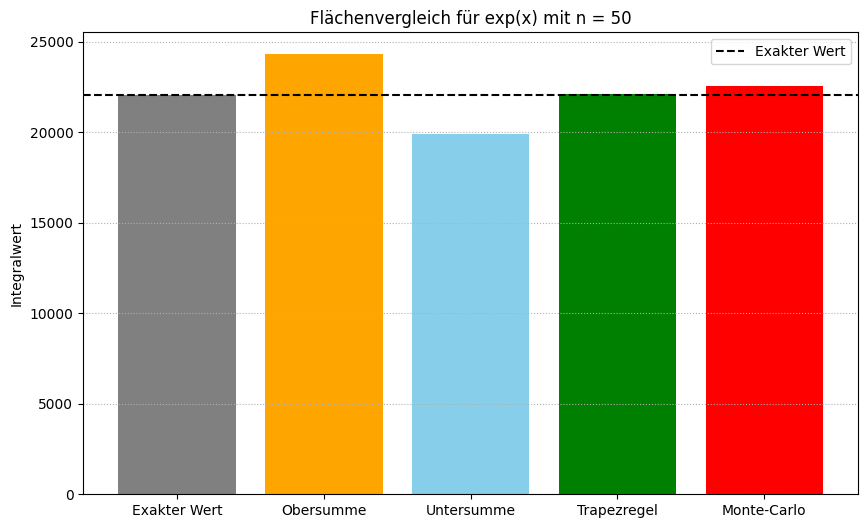

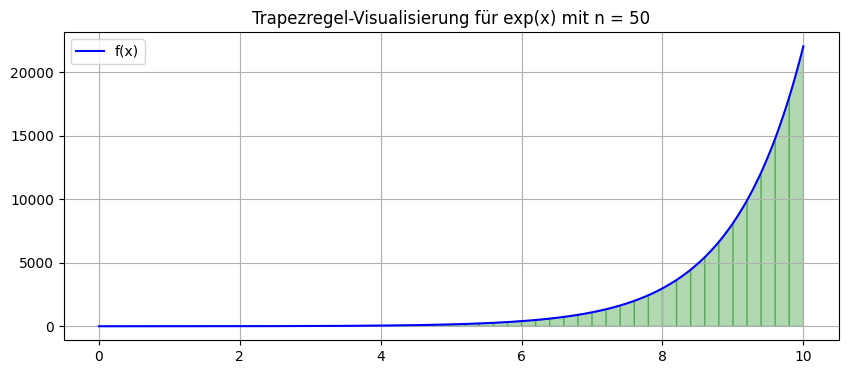

| Methode      |    Wert |    Fehler |
|:-------------|--------:|----------:|
| Exakter Wert | 9       | 0         |
| Obersumme    | 9.7056  | 0.7056    |
| Untersumme   | 8.3232  | 0.6768    |
| Trapezregel  | 9.0144  | 0.0144    |
| Monte-Carlo  | 9.07193 | 0.0719279 |


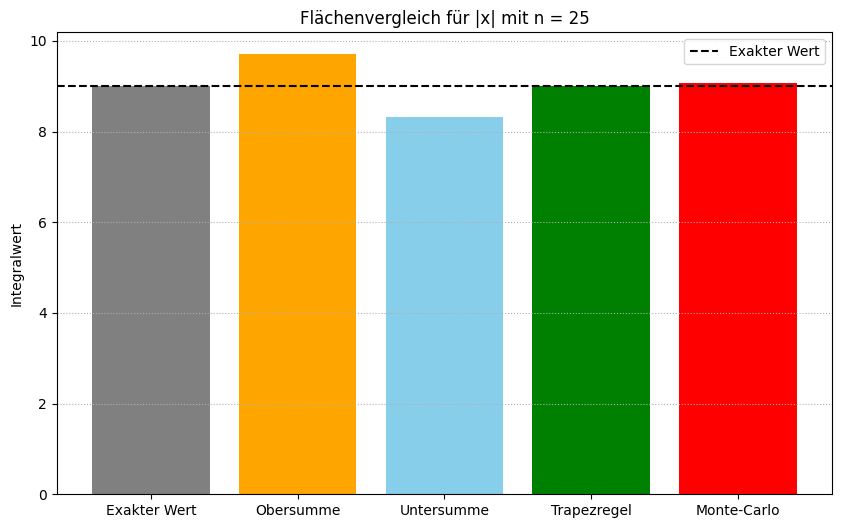

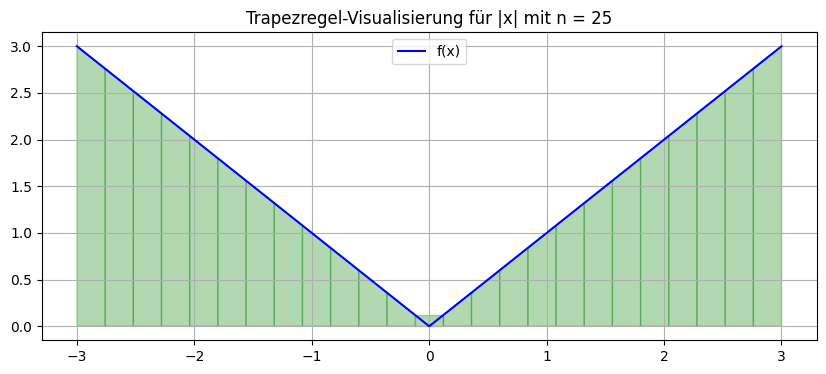

| Methode      |    Wert |    Fehler |
|:-------------|--------:|----------:|
| Exakter Wert | 1.99368 | 0         |
| Obersumme    | 9.66211 | 7.66843   |
| Untersumme   | 1.78149 | 0.212185  |
| Trapezregel  | 5.7218  | 3.72812   |
| Monte-Carlo  | 1.92251 | 0.0711699 |


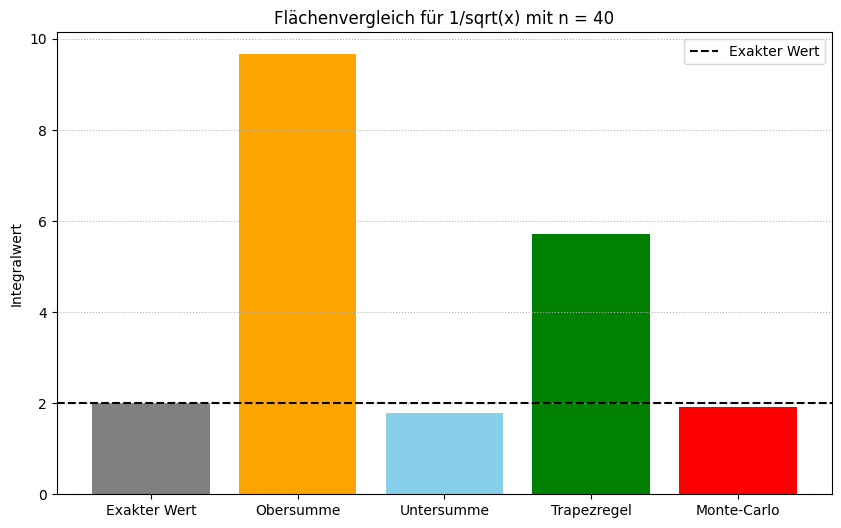

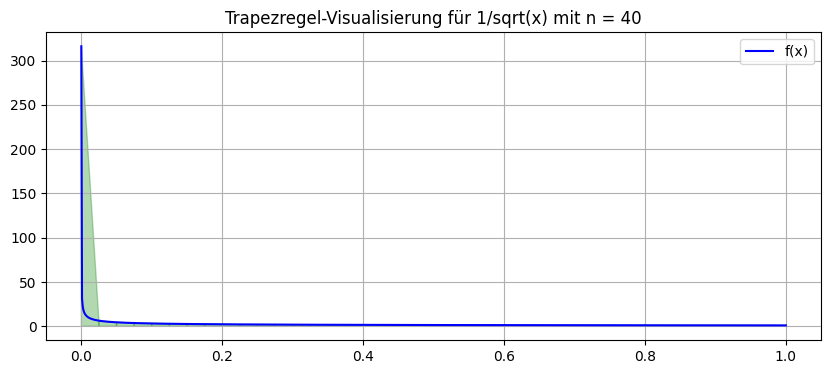

| Methode      |    Wert |      Fehler |
|:-------------|--------:|------------:|
| Exakter Wert | 1.77242 | 0           |
| Obersumme    | 1.87351 | 0.10109     |
| Untersumme   | 1.67133 | 0.101092    |
| Trapezregel  | 1.77242 | 1.03943e-06 |
| Monte-Carlo  | 1.7314  | 0.0410239   |


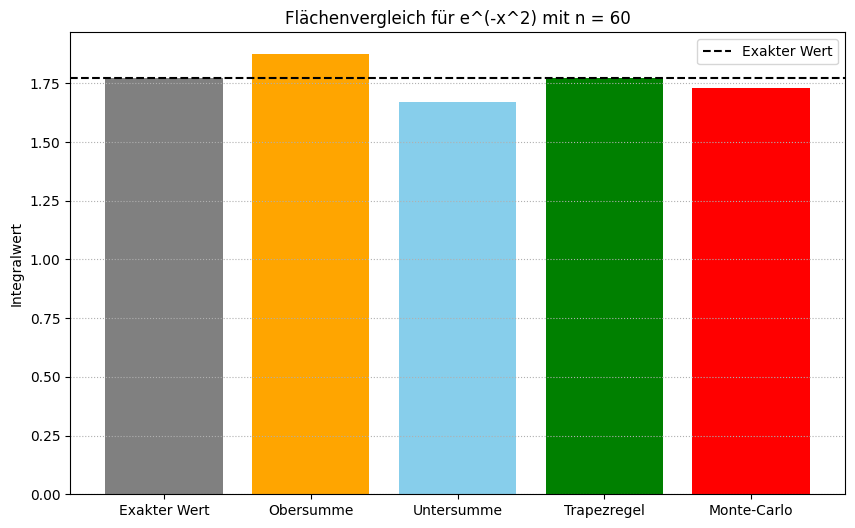

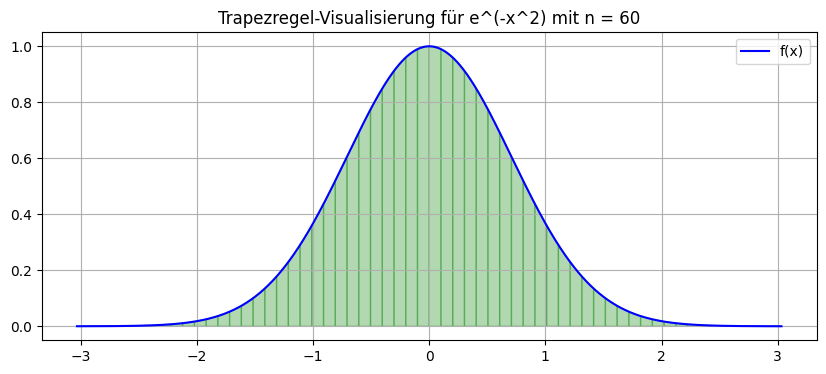

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pandas as pd

# Integration methods
def upper_sum(f, a, b, n):
    dx = (b - a) / n
    xs = np.linspace(a, b, n, endpoint=False)
    return sum(np.max(f(np.array([x, x + dx]))) * dx for x in xs)

def lower_sum(f, a, b, n):
    dx = (b - a) / n
    xs = np.linspace(a, b, n, endpoint=False)
    return sum(np.min(f(np.array([x, x + dx]))) * dx for x in xs)

def trapezoid_rule(f, a, b, n):
    xs = np.linspace(a, b, n + 1)
    dx = (b - a) / n
    return (dx / 2) * np.sum(f(xs[:-1]) + f(xs[1:]))

def monte_carlo(f, a, b, samples=5000):
    xs = np.random.uniform(a, b, samples)
    return (b - a) * np.mean(f(xs))

def exact_integral(F, a, b, f=None):
    if f is None:
        return F(b) - F(a)
    parts = get_zeros_in_interval(f, a, b)
    return sum(abs(F(parts[i + 1]) - F(parts[i])) for i in range(len(parts) - 1))

# Nullstellen-Suche für Stückelung
def get_zeros_in_interval(f, a, b, steps=1000):
    xs = np.linspace(a, b, steps)
    zeros = []
    for i in range(len(xs) - 1):
        if np.sign(f(xs[i])) != np.sign(f(xs[i + 1])):
            zeros.append((xs[i] + xs[i + 1]) / 2)
    return [a] + zeros + [b]

def piecewise_integration(method, f, a, b, n):
    parts = get_zeros_in_interval(f, a, b)
    return sum(abs(method(f, parts[i], parts[i + 1], n)) for i in range(len(parts) - 1))

# Explorative Bereichsanalyse
def get_explorative_bounds(f, xmin=-10, xmax=10, steps=1000, threshold=1e-4):
    xs = np.linspace(xmin, xmax, steps)
    ys = f(xs)
    mask = np.abs(ys) > threshold
    if np.any(mask):
        valid_xs = xs[mask]
        return valid_xs[0], valid_xs[-1]
    return xmin, xmax

# Funktionsdefinitionen
functions = {
    "sin(x)": {
        "f": np.sin,
        "F": lambda x: -np.cos(x),
        "a": 0,
        "b": 2 * np.pi
    },
    "x^2 - 4x + 2": {
        "f": lambda x: x**2 - 4*x + 2,
        "F": lambda x: (1/3) * x**3 - 2 * x**2 + 2 * x,
        "a": -3,
        "b": 3
    },
    "exp(x)": {
        "f": np.exp,
        "F": lambda x: np.exp(x),
        "a": 0,
        "b": 10
    },
    "e^(-x^2)": {
        "f": lambda x: np.exp(-x**2),
        "F": lambda x: 0.5 * np.sqrt(np.pi) * erf(x),
        "a": -2,
        "b": 2,
        "explorative": True
    },
    "1/sqrt(x)": {
        "f": lambda x: 1 / np.sqrt(x),
        "F": lambda x: 2 * np.sqrt(x),
        "a": 1e-5,
        "b": 1
    },
    "|x|": {
        "f": lambda x: np.abs(x),
        "F": lambda x: 0.5 * x * np.abs(x),
        "a": -3,
        "b": 3
    }
}

# Visualisierung & Tabelle
def visualize_table_and_methods(name, n=10, monte_samples=5000):
    f_obj = functions[name]
    f = f_obj["f"]
    F = f_obj["F"]
    a = f_obj["a"]
    b = f_obj["b"]

    if f_obj.get("explorative"):
        a, b = get_explorative_bounds(f)

    exact = exact_integral(F, a, b, f)
    upper = piecewise_integration(upper_sum, f, a, b, n)
    lower = piecewise_integration(lower_sum, f, a, b, n)
    trapezoid = piecewise_integration(trapezoid_rule, f, a, b, n)
    monte = piecewise_integration(lambda f, a, b, _: monte_carlo(f, a, b, monte_samples), f, a, b, n)

    # Tabelle
    df = pd.DataFrame({
        "Methode": ["Exakter Wert", "Obersumme", "Untersumme", "Trapezregel", "Monte-Carlo"],
        "Wert": [exact, upper, lower, trapezoid, monte],
        "Fehler": [0, abs(upper - exact), abs(lower - exact), abs(trapezoid - exact), abs(monte - exact)]
    })
    print(df.to_markdown(index=False))

    # Balkendiagramm
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df["Methode"], df["Wert"], color=["gray", "orange", "skyblue", "green", "red"])
    plt.axhline(y=exact, color="black", linestyle="--", label="Exakter Wert")
    plt.title(f"Flächenvergleich für {name} mit n = {n}")
    plt.ylabel("Integralwert")
    plt.grid(axis="y", linestyle=":")
    plt.legend()
    plt.show()

    # Trapez-Visualisierung
    xs = np.linspace(a, b, 1000)
    ys = f(xs)
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, label="f(x)", color="blue")
    dx = (b - a) / n
    for i in range(n):
        x0 = a + i * dx
        x1 = x0 + dx
        y0, y1 = f(x0), f(x1)
        plt.fill([x0, x0, x1, x1], [0, y0, y1, 0], alpha=0.3, color="green")
    plt.title(f"Trapezregel-Visualisierung für {name} mit n = {n}")
    plt.grid(True)
    plt.legend()
    plt.show()
    
def plot_all_methods_vs_n(name, monte_samples=5000):
    f_obj = functions[name]
    f = f_obj["f"]
    F = f_obj["F"]
    a = f_obj["a"]
    b = f_obj["b"]

    if f_obj.get("explorative"):
        a, b = get_explorative_bounds(f)

    exact = exact_integral(F, a, b, f)

    n_vals = np.arange(1, 101)
    upper_vals, lower_vals, trapezoid_vals, monte_vals = [], [], [], []

    for n in n_vals:
        upper_vals.append(piecewise_integration(upper_sum, f, a, b, n))
        lower_vals.append(piecewise_integration(lower_sum, f, a, b, n))
        trapezoid_vals.append(piecewise_integration(trapezoid_rule, f, a, b, n))
        monte_vals.append(piecewise_integration(lambda f, a, b, _: monte_carlo(f, a, b, monte_samples), f, a, b, n))

    plt.figure(figsize=(12, 6))
    plt.plot(n_vals, upper_vals, label="Obersumme", color="orange")
    plt.plot(n_vals, lower_vals, label="Untersumme", color="skyblue")
    plt.plot(n_vals, trapezoid_vals, label="Trapezregel", color="green")
    plt.plot(n_vals, monte_vals, label="Monte-Carlo", color="red", alpha=0.5)
    plt.axhline(y=exact, color="black", linestyle="--", label="Exakter Wert")
    plt.title(f"Konvergenzverhalten für {name}")
    plt.xlabel("Anzahl Intervalle (n)")
    plt.ylabel("Berechneter Integralwert")
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.tight_layout()
    plt.show()




# Konvergenzverhalten: Alle Methoden über n = 1–100
plot_all_methods_vs_n("sin(x)")
plot_all_methods_vs_n("x^2 - 4x + 2")
plot_all_methods_vs_n("exp(x)")
plot_all_methods_vs_n("|x|")
plot_all_methods_vs_n("1/sqrt(x)")
plot_all_methods_vs_n("e^(-x^2)")


# Sinus-Funktion: klassischer Testfall mit positiver und negativer Fläche
visualize_table_and_methods("sin(x)", n=20)

# Quadratische Funktion: einfach integrierbar
visualize_table_and_methods("x^2 - 4x + 2", n=30)

# Exponentialfunktion: streng monoton wachsend
visualize_table_and_methods("exp(x)", n=50)

# Betragsfunktion: nicht differenzierbar an x = 0
visualize_table_and_methods("|x|", n=25)

# Funktion mit Polstelle: numerisch kritisch an x -> 0
visualize_table_and_methods("1/sqrt(x)", n=40)

# Gaußfunktion: keine Stammfunktion in geschlossener Form (erfordert scipy)
visualize_table_and_methods("e^(-x^2)", n=60)

# Kapitel 5: Grenzen numerischer Integration

# Kapitel 6: Fakultativ: Gaußsche Fehlerfunktion

# Kapitel 7: Zusammenfassung und Fazit

## Anhang: Quellen, Anmerkungen, Gruppenmitglieder